In [1]:
%matplotlib inline

# Data analysis

In this notebook you will find:
- Necessary imports
- Participant age information
- Number of dyslexic parents
- Function to calculate the average erp per class (risk/no risk)
- Frequency domain features
- Connectivity with stimulus and without 

Note: Make sure you run the data analysis notebook before to have the right paths in the `metadata.csv`!

# Imports

Below are the necessary imports for this notebook. mne_connectivity still needs to be added to the environment. 

In [2]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from math import nan

# Make sure that the 5 imports below are all installed using pip install ... 
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_sensors_connectivity
import pyvista 
import mayavi
import vtk

import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
import helper_functions as hf # library useful for eeg and erp data cleaning
import initialization_functions #library to import data
import epod_helper

The newest version of mne is necessary to run connectivity plots. If you don't have the latest version, uncomment and run the line below.

In [3]:
# pip install git+https://github.com/mne-tools/mne-python.git

## Load metadata

In the notebook `data_prep_eeg.ipynb` a csv-file `metadata.csv` is created. It is saved in the same folder as this notebook. The csv contains information about the participants and the corresponding eeg and epoch files. 

In [4]:
metadata = pd.read_csv('metadata.csv', sep = ',')

In [16]:
metadata = metadata[:10]

## Participant information

The value to classify will be whether the participant is at risk for dyslexia or not. The age distribution for both groups is plotted below.

count    10.000000
mean     20.500000
std       2.223611
min      17.000000
25%      20.000000
50%      20.000000
75%      22.250000
max      24.000000
Name: age_months, dtype: float64

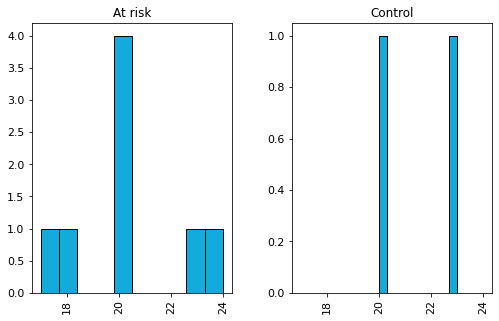

In [17]:
hist = metadata.hist(column='age_months',by='Group_AccToParents',color='#12ABDB',sharex=True, figsize=(8,5), xlabelsize=11, ylabelsize=11,bins=10,ec='black')
metadata['age_months'].describe()

Count of the gender for both groups. 

In [18]:
metadata.groupby('Group_AccToParents')['sex'].value_counts()

Group_AccToParents  sex
At risk             f      4
                    m      4
Control             f      2
Name: sex, dtype: int64

Count of whether the mom or dad is dyslexic or not. 

In [19]:
metadata.groupby('Group_AccToParents')['dyslexic_parent'].value_counts()

Group_AccToParents  dyslexic_parent
At risk             f                  4
                    m                  4
Control             Nee                2
Name: dyslexic_parent, dtype: int64

## ERP per group

This function is able to calculate the average erp for a specific condition. The function needs a dataframe like `metadata.csv` which contains the epoch files and the participants characteristics. It also needs as input the characteristic we are interested in and a single value of this characteristic. For example if we want to look at the average erp for the children who are at risk, the group will be the column (feature) containing the values at risk or control and the value will be 'at risk'. The function also needs the event dictionary in order to average the epochs over multiple participants. 

In [9]:
event_dictionary = epod_helper.event_dictionary

def data_analysis(dataframe, group, value, event_dictionary):
    epochs = []
    evoked_pp = []
    dataframe = dataframe.loc[metadata[group] == value]
    
    for index, file in dataframe.iterrows():
        print(f"Checking out file: {file['epoch_file']}")
        path = os.path.join(file['path_epoch'], file['epoch_file'])
        epoch = mne.read_epochs(path, preload=False)
        epochs.append(epoch)
    
    evoked = hf.evoked_responses(epochs, event_dictionary)
    
    for i in range(len(evoked)):
        grand_avg = mne.grand_average(evoked[i])
        evoked_pp.append(grand_avg)
    
    grand_evoked = mne.grand_average(evoked_pp)
    
    return grand_evoked.plot(spatial_colors=True)

Checking out file: 101a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\101a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2266 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 101b_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\101b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 103a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\103a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2208 matching events found
No baseline correction applied
0 p

Checking out file: 121a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\121a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2266 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 122b_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\122b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2403 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 123a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\123a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2208 matching events found
No baseline correction applied
0 p

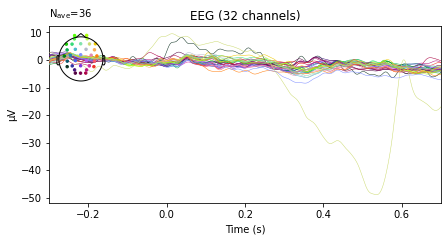

In [10]:
atrisk = data_analysis(metadata, group='Group_AccToParents', value = 'At risk', event_dictionary = epod_helper.event_dictionary)

In [ ]:
control = data_analysis(metadata, group='Group_AccToParents', value = 'Control', event_dictionary = epod_helper.event_dictionary)

In [ ]:
test_a = data_analysis(metadata, group='test', value = 'a', event_dictionary = epod_helper.event_dictionary)

In [ ]:
test_b = data_analysis(metadata, group='test', value = 'b', event_dictionary = epod_helper.event_dictionary)

## Connectivity 

In [20]:
dataframe = metadata
epochs = []
for index, file in dataframe.iterrows():
    print(f"Checking out file: {file['epoch_file']}")
    path = os.path.join(file['path_epoch'], file['epoch_file'])
    epoch = mne.read_epochs(path, preload=False)
    epochs.append(epoch)

Checking out file: 101a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\101a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2266 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 101b_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\101b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 102a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\102a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2389 matching events found
No baseline correction applied
0 p

Computing eeg connectivity

In [21]:
def data_connectivity(dataframe, group, value):
    epochs = []
    dataframe = dataframe.loc[metadata[group] == value]
    
    for index, file in dataframe.iterrows():
        print(f"Checking out file: {file['epoch_file']}")
        path = os.path.join(file['path_epoch'], file['epoch_file'])
        epoch = mne.read_epochs(path, preload=False)
        epochs.append(epoch)
    
    epochs_con = mne.concatenate_epochs(epochs)
    
    fmin, fmax = 4., 9.
    sfreq = epochs_con.info['sfreq']  # the sampling frequency
    tmin = 0.0  # exclude the baseline period
    
    con = spectral_connectivity_epochs(
        epochs_con, method='pli', mode='multitaper', fmin=fmin, fmax=fmax,
        faverage=True, tmin=tmin, mt_adaptive=False, n_jobs=1)

    # Now, visualize the connectivity in 3D:
    
    return plot_sensors_connectivity(epochs_con.info, con.get_data(output='dense')[:, :, 0])

In [22]:
connectivity_atrisk = data_connectivity(metadata, group='Group_AccToParents', value = 'At risk')

Checking out file: 101a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\101a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2266 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 101b_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\101b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 103a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\103a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2208 matching events found
No baseline correction applied
0 p

<ipython-input-21-9f3e326ae38f>:17: RuntimeWarning: There were no Annotations stored in <Epochs |  19195 events (all good), -0.299805 - 0.700195 sec, baseline -0.299805 – 0 sec, ~9.38 GB, data loaded,
 '1': 1038
 '2': 2853
 '3': 954
 '4': 1014
 '5': 2804
 '6': 934
 '7': 1016
 '8': 2786
 '9': 937
 '10': 1044
 and 2 more events ...>, so metadata was not modified.
  con = spectral_connectivity_epochs(
<ipython-input-21-9f3e326ae38f>:17: RuntimeWarning: fmin=4.000 Hz corresponds to 2.803 < 5 cycles based on the epoch length 0.701 sec, need at least 1.250 sec epochs or fmin=7.136. Spectrum estimate will be unreliable.
  con = spectral_connectivity_epochs(


    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for epoch 17
    computing connectivity for epoch 18
    computing connectivity for epoch 19
    computing connectivity for epoch 20
    computing connectivity for epoch 21
    computing connectivity for epoch 22
    computing connec

    computing connectivity for epoch 201
    computing connectivity for epoch 202
    computing connectivity for epoch 203
    computing connectivity for epoch 204
    computing connectivity for epoch 205
    computing connectivity for epoch 206
    computing connectivity for epoch 207
    computing connectivity for epoch 208
    computing connectivity for epoch 209
    computing connectivity for epoch 210
    computing connectivity for epoch 211
    computing connectivity for epoch 212
    computing connectivity for epoch 213
    computing connectivity for epoch 214
    computing connectivity for epoch 215
    computing connectivity for epoch 216
    computing connectivity for epoch 217
    computing connectivity for epoch 218
    computing connectivity for epoch 219
    computing connectivity for epoch 220
    computing connectivity for epoch 221
    computing connectivity for epoch 222
    computing connectivity for epoch 223
    computing connectivity for epoch 224
    computing co

    computing connectivity for epoch 401
    computing connectivity for epoch 402
    computing connectivity for epoch 403
    computing connectivity for epoch 404
    computing connectivity for epoch 405
    computing connectivity for epoch 406
    computing connectivity for epoch 407
    computing connectivity for epoch 408
    computing connectivity for epoch 409
    computing connectivity for epoch 410
    computing connectivity for epoch 411
    computing connectivity for epoch 412
    computing connectivity for epoch 413
    computing connectivity for epoch 414
    computing connectivity for epoch 415
    computing connectivity for epoch 416
    computing connectivity for epoch 417
    computing connectivity for epoch 418
    computing connectivity for epoch 419
    computing connectivity for epoch 420
    computing connectivity for epoch 421
    computing connectivity for epoch 422
    computing connectivity for epoch 423
    computing connectivity for epoch 424
    computing co

    computing connectivity for epoch 601
    computing connectivity for epoch 602
    computing connectivity for epoch 603
    computing connectivity for epoch 604
    computing connectivity for epoch 605
    computing connectivity for epoch 606
    computing connectivity for epoch 607
    computing connectivity for epoch 608
    computing connectivity for epoch 609
    computing connectivity for epoch 610
    computing connectivity for epoch 611
    computing connectivity for epoch 612
    computing connectivity for epoch 613
    computing connectivity for epoch 614
    computing connectivity for epoch 615
    computing connectivity for epoch 616
    computing connectivity for epoch 617
    computing connectivity for epoch 618
    computing connectivity for epoch 619
    computing connectivity for epoch 620
    computing connectivity for epoch 621
    computing connectivity for epoch 622
    computing connectivity for epoch 623
    computing connectivity for epoch 624
    computing co

    computing connectivity for epoch 801
    computing connectivity for epoch 802
    computing connectivity for epoch 803
    computing connectivity for epoch 804
    computing connectivity for epoch 805
    computing connectivity for epoch 806
    computing connectivity for epoch 807
    computing connectivity for epoch 808
    computing connectivity for epoch 809
    computing connectivity for epoch 810
    computing connectivity for epoch 811
    computing connectivity for epoch 812
    computing connectivity for epoch 813
    computing connectivity for epoch 814
    computing connectivity for epoch 815
    computing connectivity for epoch 816
    computing connectivity for epoch 817
    computing connectivity for epoch 818
    computing connectivity for epoch 819
    computing connectivity for epoch 820
    computing connectivity for epoch 821
    computing connectivity for epoch 822
    computing connectivity for epoch 823
    computing connectivity for epoch 824
    computing co

    computing connectivity for epoch 1001
    computing connectivity for epoch 1002
    computing connectivity for epoch 1003
    computing connectivity for epoch 1004
    computing connectivity for epoch 1005
    computing connectivity for epoch 1006
    computing connectivity for epoch 1007
    computing connectivity for epoch 1008
    computing connectivity for epoch 1009
    computing connectivity for epoch 1010
    computing connectivity for epoch 1011
    computing connectivity for epoch 1012
    computing connectivity for epoch 1013
    computing connectivity for epoch 1014
    computing connectivity for epoch 1015
    computing connectivity for epoch 1016
    computing connectivity for epoch 1017
    computing connectivity for epoch 1018
    computing connectivity for epoch 1019
    computing connectivity for epoch 1020
    computing connectivity for epoch 1021
    computing connectivity for epoch 1022
    computing connectivity for epoch 1023
    computing connectivity for epo

    computing connectivity for epoch 1197
    computing connectivity for epoch 1198
    computing connectivity for epoch 1199
    computing connectivity for epoch 1200
    computing connectivity for epoch 1201
    computing connectivity for epoch 1202
    computing connectivity for epoch 1203
    computing connectivity for epoch 1204
    computing connectivity for epoch 1205
    computing connectivity for epoch 1206
    computing connectivity for epoch 1207
    computing connectivity for epoch 1208
    computing connectivity for epoch 1209
    computing connectivity for epoch 1210
    computing connectivity for epoch 1211
    computing connectivity for epoch 1212
    computing connectivity for epoch 1213
    computing connectivity for epoch 1214
    computing connectivity for epoch 1215
    computing connectivity for epoch 1216
    computing connectivity for epoch 1217
    computing connectivity for epoch 1218
    computing connectivity for epoch 1219
    computing connectivity for epo

    computing connectivity for epoch 1393
    computing connectivity for epoch 1394
    computing connectivity for epoch 1395
    computing connectivity for epoch 1396
    computing connectivity for epoch 1397
    computing connectivity for epoch 1398
    computing connectivity for epoch 1399
    computing connectivity for epoch 1400
    computing connectivity for epoch 1401
    computing connectivity for epoch 1402
    computing connectivity for epoch 1403
    computing connectivity for epoch 1404
    computing connectivity for epoch 1405
    computing connectivity for epoch 1406
    computing connectivity for epoch 1407
    computing connectivity for epoch 1408
    computing connectivity for epoch 1409
    computing connectivity for epoch 1410
    computing connectivity for epoch 1411
    computing connectivity for epoch 1412
    computing connectivity for epoch 1413
    computing connectivity for epoch 1414
    computing connectivity for epoch 1415
    computing connectivity for epo

    computing connectivity for epoch 1589
    computing connectivity for epoch 1590
    computing connectivity for epoch 1591
    computing connectivity for epoch 1592
    computing connectivity for epoch 1593
    computing connectivity for epoch 1594
    computing connectivity for epoch 1595
    computing connectivity for epoch 1596
    computing connectivity for epoch 1597
    computing connectivity for epoch 1598
    computing connectivity for epoch 1599
    computing connectivity for epoch 1600
    computing connectivity for epoch 1601
    computing connectivity for epoch 1602
    computing connectivity for epoch 1603
    computing connectivity for epoch 1604
    computing connectivity for epoch 1605
    computing connectivity for epoch 1606
    computing connectivity for epoch 1607
    computing connectivity for epoch 1608
    computing connectivity for epoch 1609
    computing connectivity for epoch 1610
    computing connectivity for epoch 1611
    computing connectivity for epo

    computing connectivity for epoch 1785
    computing connectivity for epoch 1786
    computing connectivity for epoch 1787
    computing connectivity for epoch 1788
    computing connectivity for epoch 1789
    computing connectivity for epoch 1790
    computing connectivity for epoch 1791
    computing connectivity for epoch 1792
    computing connectivity for epoch 1793
    computing connectivity for epoch 1794
    computing connectivity for epoch 1795
    computing connectivity for epoch 1796
    computing connectivity for epoch 1797
    computing connectivity for epoch 1798
    computing connectivity for epoch 1799
    computing connectivity for epoch 1800
    computing connectivity for epoch 1801
    computing connectivity for epoch 1802
    computing connectivity for epoch 1803
    computing connectivity for epoch 1804
    computing connectivity for epoch 1805
    computing connectivity for epoch 1806
    computing connectivity for epoch 1807
    computing connectivity for epo

    computing connectivity for epoch 1981
    computing connectivity for epoch 1982
    computing connectivity for epoch 1983
    computing connectivity for epoch 1984
    computing connectivity for epoch 1985
    computing connectivity for epoch 1986
    computing connectivity for epoch 1987
    computing connectivity for epoch 1988
    computing connectivity for epoch 1989
    computing connectivity for epoch 1990
    computing connectivity for epoch 1991
    computing connectivity for epoch 1992
    computing connectivity for epoch 1993
    computing connectivity for epoch 1994
    computing connectivity for epoch 1995
    computing connectivity for epoch 1996
    computing connectivity for epoch 1997
    computing connectivity for epoch 1998
    computing connectivity for epoch 1999
    computing connectivity for epoch 2000
    computing connectivity for epoch 2001
    computing connectivity for epoch 2002
    computing connectivity for epoch 2003
    computing connectivity for epo

    computing connectivity for epoch 2177
    computing connectivity for epoch 2178
    computing connectivity for epoch 2179
    computing connectivity for epoch 2180
    computing connectivity for epoch 2181
    computing connectivity for epoch 2182
    computing connectivity for epoch 2183
    computing connectivity for epoch 2184
    computing connectivity for epoch 2185
    computing connectivity for epoch 2186
    computing connectivity for epoch 2187
    computing connectivity for epoch 2188
    computing connectivity for epoch 2189
    computing connectivity for epoch 2190
    computing connectivity for epoch 2191
    computing connectivity for epoch 2192
    computing connectivity for epoch 2193
    computing connectivity for epoch 2194
    computing connectivity for epoch 2195
    computing connectivity for epoch 2196
    computing connectivity for epoch 2197
    computing connectivity for epoch 2198
    computing connectivity for epoch 2199
    computing connectivity for epo

    computing connectivity for epoch 2373
    computing connectivity for epoch 2374
    computing connectivity for epoch 2375
    computing connectivity for epoch 2376
    computing connectivity for epoch 2377
    computing connectivity for epoch 2378
    computing connectivity for epoch 2379
    computing connectivity for epoch 2380
    computing connectivity for epoch 2381
    computing connectivity for epoch 2382
    computing connectivity for epoch 2383
    computing connectivity for epoch 2384
    computing connectivity for epoch 2385
    computing connectivity for epoch 2386
    computing connectivity for epoch 2387
    computing connectivity for epoch 2388
    computing connectivity for epoch 2389
    computing connectivity for epoch 2390
    computing connectivity for epoch 2391
    computing connectivity for epoch 2392
    computing connectivity for epoch 2393
    computing connectivity for epoch 2394
    computing connectivity for epoch 2395
    computing connectivity for epo

    computing connectivity for epoch 2569
    computing connectivity for epoch 2570
    computing connectivity for epoch 2571
    computing connectivity for epoch 2572
    computing connectivity for epoch 2573
    computing connectivity for epoch 2574
    computing connectivity for epoch 2575
    computing connectivity for epoch 2576
    computing connectivity for epoch 2577
    computing connectivity for epoch 2578
    computing connectivity for epoch 2579
    computing connectivity for epoch 2580
    computing connectivity for epoch 2581
    computing connectivity for epoch 2582
    computing connectivity for epoch 2583
    computing connectivity for epoch 2584
    computing connectivity for epoch 2585
    computing connectivity for epoch 2586
    computing connectivity for epoch 2587
    computing connectivity for epoch 2588
    computing connectivity for epoch 2589
    computing connectivity for epoch 2590
    computing connectivity for epoch 2591
    computing connectivity for epo

    computing connectivity for epoch 2765
    computing connectivity for epoch 2766
    computing connectivity for epoch 2767
    computing connectivity for epoch 2768
    computing connectivity for epoch 2769
    computing connectivity for epoch 2770
    computing connectivity for epoch 2771
    computing connectivity for epoch 2772
    computing connectivity for epoch 2773
    computing connectivity for epoch 2774
    computing connectivity for epoch 2775
    computing connectivity for epoch 2776
    computing connectivity for epoch 2777
    computing connectivity for epoch 2778
    computing connectivity for epoch 2779
    computing connectivity for epoch 2780
    computing connectivity for epoch 2781
    computing connectivity for epoch 2782
    computing connectivity for epoch 2783
    computing connectivity for epoch 2784
    computing connectivity for epoch 2785
    computing connectivity for epoch 2786
    computing connectivity for epoch 2787
    computing connectivity for epo

    computing connectivity for epoch 2961
    computing connectivity for epoch 2962
    computing connectivity for epoch 2963
    computing connectivity for epoch 2964
    computing connectivity for epoch 2965
    computing connectivity for epoch 2966
    computing connectivity for epoch 2967
    computing connectivity for epoch 2968
    computing connectivity for epoch 2969
    computing connectivity for epoch 2970
    computing connectivity for epoch 2971
    computing connectivity for epoch 2972
    computing connectivity for epoch 2973
    computing connectivity for epoch 2974
    computing connectivity for epoch 2975
    computing connectivity for epoch 2976
    computing connectivity for epoch 2977
    computing connectivity for epoch 2978
    computing connectivity for epoch 2979
    computing connectivity for epoch 2980
    computing connectivity for epoch 2981
    computing connectivity for epoch 2982
    computing connectivity for epoch 2983
    computing connectivity for epo

    computing connectivity for epoch 3157
    computing connectivity for epoch 3158
    computing connectivity for epoch 3159
    computing connectivity for epoch 3160
    computing connectivity for epoch 3161
    computing connectivity for epoch 3162
    computing connectivity for epoch 3163
    computing connectivity for epoch 3164
    computing connectivity for epoch 3165
    computing connectivity for epoch 3166
    computing connectivity for epoch 3167
    computing connectivity for epoch 3168
    computing connectivity for epoch 3169
    computing connectivity for epoch 3170
    computing connectivity for epoch 3171
    computing connectivity for epoch 3172
    computing connectivity for epoch 3173
    computing connectivity for epoch 3174
    computing connectivity for epoch 3175
    computing connectivity for epoch 3176
    computing connectivity for epoch 3177
    computing connectivity for epoch 3178
    computing connectivity for epoch 3179
    computing connectivity for epo

    computing connectivity for epoch 3353
    computing connectivity for epoch 3354
    computing connectivity for epoch 3355
    computing connectivity for epoch 3356
    computing connectivity for epoch 3357
    computing connectivity for epoch 3358
    computing connectivity for epoch 3359
    computing connectivity for epoch 3360
    computing connectivity for epoch 3361
    computing connectivity for epoch 3362
    computing connectivity for epoch 3363
    computing connectivity for epoch 3364
    computing connectivity for epoch 3365
    computing connectivity for epoch 3366
    computing connectivity for epoch 3367
    computing connectivity for epoch 3368
    computing connectivity for epoch 3369
    computing connectivity for epoch 3370
    computing connectivity for epoch 3371
    computing connectivity for epoch 3372
    computing connectivity for epoch 3373
    computing connectivity for epoch 3374
    computing connectivity for epoch 3375
    computing connectivity for epo

    computing connectivity for epoch 3549
    computing connectivity for epoch 3550
    computing connectivity for epoch 3551
    computing connectivity for epoch 3552
    computing connectivity for epoch 3553
    computing connectivity for epoch 3554
    computing connectivity for epoch 3555
    computing connectivity for epoch 3556
    computing connectivity for epoch 3557
    computing connectivity for epoch 3558
    computing connectivity for epoch 3559
    computing connectivity for epoch 3560
    computing connectivity for epoch 3561
    computing connectivity for epoch 3562
    computing connectivity for epoch 3563
    computing connectivity for epoch 3564
    computing connectivity for epoch 3565
    computing connectivity for epoch 3566
    computing connectivity for epoch 3567
    computing connectivity for epoch 3568
    computing connectivity for epoch 3569
    computing connectivity for epoch 3570
    computing connectivity for epoch 3571
    computing connectivity for epo

    computing connectivity for epoch 3745
    computing connectivity for epoch 3746
    computing connectivity for epoch 3747
    computing connectivity for epoch 3748
    computing connectivity for epoch 3749
    computing connectivity for epoch 3750
    computing connectivity for epoch 3751
    computing connectivity for epoch 3752
    computing connectivity for epoch 3753
    computing connectivity for epoch 3754
    computing connectivity for epoch 3755
    computing connectivity for epoch 3756
    computing connectivity for epoch 3757
    computing connectivity for epoch 3758
    computing connectivity for epoch 3759
    computing connectivity for epoch 3760
    computing connectivity for epoch 3761
    computing connectivity for epoch 3762
    computing connectivity for epoch 3763
    computing connectivity for epoch 3764
    computing connectivity for epoch 3765
    computing connectivity for epoch 3766
    computing connectivity for epoch 3767
    computing connectivity for epo

    computing connectivity for epoch 3941
    computing connectivity for epoch 3942
    computing connectivity for epoch 3943
    computing connectivity for epoch 3944
    computing connectivity for epoch 3945
    computing connectivity for epoch 3946
    computing connectivity for epoch 3947
    computing connectivity for epoch 3948
    computing connectivity for epoch 3949
    computing connectivity for epoch 3950
    computing connectivity for epoch 3951
    computing connectivity for epoch 3952
    computing connectivity for epoch 3953
    computing connectivity for epoch 3954
    computing connectivity for epoch 3955
    computing connectivity for epoch 3956
    computing connectivity for epoch 3957
    computing connectivity for epoch 3958
    computing connectivity for epoch 3959
    computing connectivity for epoch 3960
    computing connectivity for epoch 3961
    computing connectivity for epoch 3962
    computing connectivity for epoch 3963
    computing connectivity for epo

    computing connectivity for epoch 4137
    computing connectivity for epoch 4138
    computing connectivity for epoch 4139
    computing connectivity for epoch 4140
    computing connectivity for epoch 4141
    computing connectivity for epoch 4142
    computing connectivity for epoch 4143
    computing connectivity for epoch 4144
    computing connectivity for epoch 4145
    computing connectivity for epoch 4146
    computing connectivity for epoch 4147
    computing connectivity for epoch 4148
    computing connectivity for epoch 4149
    computing connectivity for epoch 4150
    computing connectivity for epoch 4151
    computing connectivity for epoch 4152
    computing connectivity for epoch 4153
    computing connectivity for epoch 4154
    computing connectivity for epoch 4155
    computing connectivity for epoch 4156
    computing connectivity for epoch 4157
    computing connectivity for epoch 4158
    computing connectivity for epoch 4159
    computing connectivity for epo

    computing connectivity for epoch 4333
    computing connectivity for epoch 4334
    computing connectivity for epoch 4335
    computing connectivity for epoch 4336
    computing connectivity for epoch 4337
    computing connectivity for epoch 4338
    computing connectivity for epoch 4339
    computing connectivity for epoch 4340
    computing connectivity for epoch 4341
    computing connectivity for epoch 4342
    computing connectivity for epoch 4343
    computing connectivity for epoch 4344
    computing connectivity for epoch 4345
    computing connectivity for epoch 4346
    computing connectivity for epoch 4347
    computing connectivity for epoch 4348
    computing connectivity for epoch 4349
    computing connectivity for epoch 4350
    computing connectivity for epoch 4351
    computing connectivity for epoch 4352
    computing connectivity for epoch 4353
    computing connectivity for epoch 4354
    computing connectivity for epoch 4355
    computing connectivity for epo

    computing connectivity for epoch 4529
    computing connectivity for epoch 4530
    computing connectivity for epoch 4531
    computing connectivity for epoch 4532
    computing connectivity for epoch 4533
    computing connectivity for epoch 4534
    computing connectivity for epoch 4535
    computing connectivity for epoch 4536
    computing connectivity for epoch 4537
    computing connectivity for epoch 4538
    computing connectivity for epoch 4539
    computing connectivity for epoch 4540
    computing connectivity for epoch 4541
    computing connectivity for epoch 4542
    computing connectivity for epoch 4543
    computing connectivity for epoch 4544
    computing connectivity for epoch 4545
    computing connectivity for epoch 4546
    computing connectivity for epoch 4547
    computing connectivity for epoch 4548
    computing connectivity for epoch 4549
    computing connectivity for epoch 4550
    computing connectivity for epoch 4551
    computing connectivity for epo

    computing connectivity for epoch 4725
    computing connectivity for epoch 4726
    computing connectivity for epoch 4727
    computing connectivity for epoch 4728
    computing connectivity for epoch 4729
    computing connectivity for epoch 4730
    computing connectivity for epoch 4731
    computing connectivity for epoch 4732
    computing connectivity for epoch 4733
    computing connectivity for epoch 4734
    computing connectivity for epoch 4735
    computing connectivity for epoch 4736
    computing connectivity for epoch 4737
    computing connectivity for epoch 4738
    computing connectivity for epoch 4739
    computing connectivity for epoch 4740
    computing connectivity for epoch 4741
    computing connectivity for epoch 4742
    computing connectivity for epoch 4743
    computing connectivity for epoch 4744
    computing connectivity for epoch 4745
    computing connectivity for epoch 4746
    computing connectivity for epoch 4747
    computing connectivity for epo

    computing connectivity for epoch 4921
    computing connectivity for epoch 4922
    computing connectivity for epoch 4923
    computing connectivity for epoch 4924
    computing connectivity for epoch 4925
    computing connectivity for epoch 4926
    computing connectivity for epoch 4927
    computing connectivity for epoch 4928
    computing connectivity for epoch 4929
    computing connectivity for epoch 4930
    computing connectivity for epoch 4931
    computing connectivity for epoch 4932
    computing connectivity for epoch 4933
    computing connectivity for epoch 4934
    computing connectivity for epoch 4935
    computing connectivity for epoch 4936
    computing connectivity for epoch 4937
    computing connectivity for epoch 4938
    computing connectivity for epoch 4939
    computing connectivity for epoch 4940
    computing connectivity for epoch 4941
    computing connectivity for epoch 4942
    computing connectivity for epoch 4943
    computing connectivity for epo

    computing connectivity for epoch 5117
    computing connectivity for epoch 5118
    computing connectivity for epoch 5119
    computing connectivity for epoch 5120
    computing connectivity for epoch 5121
    computing connectivity for epoch 5122
    computing connectivity for epoch 5123
    computing connectivity for epoch 5124
    computing connectivity for epoch 5125
    computing connectivity for epoch 5126
    computing connectivity for epoch 5127
    computing connectivity for epoch 5128
    computing connectivity for epoch 5129
    computing connectivity for epoch 5130
    computing connectivity for epoch 5131
    computing connectivity for epoch 5132
    computing connectivity for epoch 5133
    computing connectivity for epoch 5134
    computing connectivity for epoch 5135
    computing connectivity for epoch 5136
    computing connectivity for epoch 5137
    computing connectivity for epoch 5138
    computing connectivity for epoch 5139
    computing connectivity for epo

    computing connectivity for epoch 5313
    computing connectivity for epoch 5314
    computing connectivity for epoch 5315
    computing connectivity for epoch 5316
    computing connectivity for epoch 5317
    computing connectivity for epoch 5318
    computing connectivity for epoch 5319
    computing connectivity for epoch 5320
    computing connectivity for epoch 5321
    computing connectivity for epoch 5322
    computing connectivity for epoch 5323
    computing connectivity for epoch 5324
    computing connectivity for epoch 5325
    computing connectivity for epoch 5326
    computing connectivity for epoch 5327
    computing connectivity for epoch 5328
    computing connectivity for epoch 5329
    computing connectivity for epoch 5330
    computing connectivity for epoch 5331
    computing connectivity for epoch 5332
    computing connectivity for epoch 5333
    computing connectivity for epoch 5334
    computing connectivity for epoch 5335
    computing connectivity for epo

    computing connectivity for epoch 5509
    computing connectivity for epoch 5510
    computing connectivity for epoch 5511
    computing connectivity for epoch 5512
    computing connectivity for epoch 5513
    computing connectivity for epoch 5514
    computing connectivity for epoch 5515
    computing connectivity for epoch 5516
    computing connectivity for epoch 5517
    computing connectivity for epoch 5518
    computing connectivity for epoch 5519
    computing connectivity for epoch 5520
    computing connectivity for epoch 5521
    computing connectivity for epoch 5522
    computing connectivity for epoch 5523
    computing connectivity for epoch 5524
    computing connectivity for epoch 5525
    computing connectivity for epoch 5526
    computing connectivity for epoch 5527
    computing connectivity for epoch 5528
    computing connectivity for epoch 5529
    computing connectivity for epoch 5530
    computing connectivity for epoch 5531
    computing connectivity for epo

    computing connectivity for epoch 5705
    computing connectivity for epoch 5706
    computing connectivity for epoch 5707
    computing connectivity for epoch 5708
    computing connectivity for epoch 5709
    computing connectivity for epoch 5710
    computing connectivity for epoch 5711
    computing connectivity for epoch 5712
    computing connectivity for epoch 5713
    computing connectivity for epoch 5714
    computing connectivity for epoch 5715
    computing connectivity for epoch 5716
    computing connectivity for epoch 5717
    computing connectivity for epoch 5718
    computing connectivity for epoch 5719
    computing connectivity for epoch 5720
    computing connectivity for epoch 5721
    computing connectivity for epoch 5722
    computing connectivity for epoch 5723
    computing connectivity for epoch 5724
    computing connectivity for epoch 5725
    computing connectivity for epoch 5726
    computing connectivity for epoch 5727
    computing connectivity for epo

    computing connectivity for epoch 5901
    computing connectivity for epoch 5902
    computing connectivity for epoch 5903
    computing connectivity for epoch 5904
    computing connectivity for epoch 5905
    computing connectivity for epoch 5906
    computing connectivity for epoch 5907
    computing connectivity for epoch 5908
    computing connectivity for epoch 5909
    computing connectivity for epoch 5910
    computing connectivity for epoch 5911
    computing connectivity for epoch 5912
    computing connectivity for epoch 5913
    computing connectivity for epoch 5914
    computing connectivity for epoch 5915
    computing connectivity for epoch 5916
    computing connectivity for epoch 5917
    computing connectivity for epoch 5918
    computing connectivity for epoch 5919
    computing connectivity for epoch 5920
    computing connectivity for epoch 5921
    computing connectivity for epoch 5922
    computing connectivity for epoch 5923
    computing connectivity for epo

    computing connectivity for epoch 6097
    computing connectivity for epoch 6098
    computing connectivity for epoch 6099
    computing connectivity for epoch 6100
    computing connectivity for epoch 6101
    computing connectivity for epoch 6102
    computing connectivity for epoch 6103
    computing connectivity for epoch 6104
    computing connectivity for epoch 6105
    computing connectivity for epoch 6106
    computing connectivity for epoch 6107
    computing connectivity for epoch 6108
    computing connectivity for epoch 6109
    computing connectivity for epoch 6110
    computing connectivity for epoch 6111
    computing connectivity for epoch 6112
    computing connectivity for epoch 6113
    computing connectivity for epoch 6114
    computing connectivity for epoch 6115
    computing connectivity for epoch 6116
    computing connectivity for epoch 6117
    computing connectivity for epoch 6118
    computing connectivity for epoch 6119
    computing connectivity for epo

    computing connectivity for epoch 6293
    computing connectivity for epoch 6294
    computing connectivity for epoch 6295
    computing connectivity for epoch 6296
    computing connectivity for epoch 6297
    computing connectivity for epoch 6298
    computing connectivity for epoch 6299
    computing connectivity for epoch 6300
    computing connectivity for epoch 6301
    computing connectivity for epoch 6302
    computing connectivity for epoch 6303
    computing connectivity for epoch 6304
    computing connectivity for epoch 6305
    computing connectivity for epoch 6306
    computing connectivity for epoch 6307
    computing connectivity for epoch 6308
    computing connectivity for epoch 6309
    computing connectivity for epoch 6310
    computing connectivity for epoch 6311
    computing connectivity for epoch 6312
    computing connectivity for epoch 6313
    computing connectivity for epoch 6314
    computing connectivity for epoch 6315
    computing connectivity for epo

    computing connectivity for epoch 6489
    computing connectivity for epoch 6490
    computing connectivity for epoch 6491
    computing connectivity for epoch 6492
    computing connectivity for epoch 6493
    computing connectivity for epoch 6494
    computing connectivity for epoch 6495
    computing connectivity for epoch 6496
    computing connectivity for epoch 6497
    computing connectivity for epoch 6498
    computing connectivity for epoch 6499
    computing connectivity for epoch 6500
    computing connectivity for epoch 6501
    computing connectivity for epoch 6502
    computing connectivity for epoch 6503
    computing connectivity for epoch 6504
    computing connectivity for epoch 6505
    computing connectivity for epoch 6506
    computing connectivity for epoch 6507
    computing connectivity for epoch 6508
    computing connectivity for epoch 6509
    computing connectivity for epoch 6510
    computing connectivity for epoch 6511
    computing connectivity for epo

    computing connectivity for epoch 6685
    computing connectivity for epoch 6686
    computing connectivity for epoch 6687
    computing connectivity for epoch 6688
    computing connectivity for epoch 6689
    computing connectivity for epoch 6690
    computing connectivity for epoch 6691
    computing connectivity for epoch 6692
    computing connectivity for epoch 6693
    computing connectivity for epoch 6694
    computing connectivity for epoch 6695
    computing connectivity for epoch 6696
    computing connectivity for epoch 6697
    computing connectivity for epoch 6698
    computing connectivity for epoch 6699
    computing connectivity for epoch 6700
    computing connectivity for epoch 6701
    computing connectivity for epoch 6702
    computing connectivity for epoch 6703
    computing connectivity for epoch 6704
    computing connectivity for epoch 6705
    computing connectivity for epoch 6706
    computing connectivity for epoch 6707
    computing connectivity for epo

    computing connectivity for epoch 6881
    computing connectivity for epoch 6882
    computing connectivity for epoch 6883
    computing connectivity for epoch 6884
    computing connectivity for epoch 6885
    computing connectivity for epoch 6886
    computing connectivity for epoch 6887
    computing connectivity for epoch 6888
    computing connectivity for epoch 6889
    computing connectivity for epoch 6890
    computing connectivity for epoch 6891
    computing connectivity for epoch 6892
    computing connectivity for epoch 6893
    computing connectivity for epoch 6894
    computing connectivity for epoch 6895
    computing connectivity for epoch 6896
    computing connectivity for epoch 6897
    computing connectivity for epoch 6898
    computing connectivity for epoch 6899
    computing connectivity for epoch 6900
    computing connectivity for epoch 6901
    computing connectivity for epoch 6902
    computing connectivity for epoch 6903
    computing connectivity for epo

    computing connectivity for epoch 7077
    computing connectivity for epoch 7078
    computing connectivity for epoch 7079
    computing connectivity for epoch 7080
    computing connectivity for epoch 7081
    computing connectivity for epoch 7082
    computing connectivity for epoch 7083
    computing connectivity for epoch 7084
    computing connectivity for epoch 7085
    computing connectivity for epoch 7086
    computing connectivity for epoch 7087
    computing connectivity for epoch 7088
    computing connectivity for epoch 7089
    computing connectivity for epoch 7090
    computing connectivity for epoch 7091
    computing connectivity for epoch 7092
    computing connectivity for epoch 7093
    computing connectivity for epoch 7094
    computing connectivity for epoch 7095
    computing connectivity for epoch 7096
    computing connectivity for epoch 7097
    computing connectivity for epoch 7098
    computing connectivity for epoch 7099
    computing connectivity for epo

    computing connectivity for epoch 7273
    computing connectivity for epoch 7274
    computing connectivity for epoch 7275
    computing connectivity for epoch 7276
    computing connectivity for epoch 7277
    computing connectivity for epoch 7278
    computing connectivity for epoch 7279
    computing connectivity for epoch 7280
    computing connectivity for epoch 7281
    computing connectivity for epoch 7282
    computing connectivity for epoch 7283
    computing connectivity for epoch 7284
    computing connectivity for epoch 7285
    computing connectivity for epoch 7286
    computing connectivity for epoch 7287
    computing connectivity for epoch 7288
    computing connectivity for epoch 7289
    computing connectivity for epoch 7290
    computing connectivity for epoch 7291
    computing connectivity for epoch 7292
    computing connectivity for epoch 7293
    computing connectivity for epoch 7294
    computing connectivity for epoch 7295
    computing connectivity for epo

    computing connectivity for epoch 7469
    computing connectivity for epoch 7470
    computing connectivity for epoch 7471
    computing connectivity for epoch 7472
    computing connectivity for epoch 7473
    computing connectivity for epoch 7474
    computing connectivity for epoch 7475
    computing connectivity for epoch 7476
    computing connectivity for epoch 7477
    computing connectivity for epoch 7478
    computing connectivity for epoch 7479
    computing connectivity for epoch 7480
    computing connectivity for epoch 7481
    computing connectivity for epoch 7482
    computing connectivity for epoch 7483
    computing connectivity for epoch 7484
    computing connectivity for epoch 7485
    computing connectivity for epoch 7486
    computing connectivity for epoch 7487
    computing connectivity for epoch 7488
    computing connectivity for epoch 7489
    computing connectivity for epoch 7490
    computing connectivity for epoch 7491
    computing connectivity for epo

    computing connectivity for epoch 7665
    computing connectivity for epoch 7666
    computing connectivity for epoch 7667
    computing connectivity for epoch 7668
    computing connectivity for epoch 7669
    computing connectivity for epoch 7670
    computing connectivity for epoch 7671
    computing connectivity for epoch 7672
    computing connectivity for epoch 7673
    computing connectivity for epoch 7674
    computing connectivity for epoch 7675
    computing connectivity for epoch 7676
    computing connectivity for epoch 7677
    computing connectivity for epoch 7678
    computing connectivity for epoch 7679
    computing connectivity for epoch 7680
    computing connectivity for epoch 7681
    computing connectivity for epoch 7682
    computing connectivity for epoch 7683
    computing connectivity for epoch 7684
    computing connectivity for epoch 7685
    computing connectivity for epoch 7686
    computing connectivity for epoch 7687
    computing connectivity for epo

    computing connectivity for epoch 7861
    computing connectivity for epoch 7862
    computing connectivity for epoch 7863
    computing connectivity for epoch 7864
    computing connectivity for epoch 7865
    computing connectivity for epoch 7866
    computing connectivity for epoch 7867
    computing connectivity for epoch 7868
    computing connectivity for epoch 7869
    computing connectivity for epoch 7870
    computing connectivity for epoch 7871
    computing connectivity for epoch 7872
    computing connectivity for epoch 7873
    computing connectivity for epoch 7874
    computing connectivity for epoch 7875
    computing connectivity for epoch 7876
    computing connectivity for epoch 7877
    computing connectivity for epoch 7878
    computing connectivity for epoch 7879
    computing connectivity for epoch 7880
    computing connectivity for epoch 7881
    computing connectivity for epoch 7882
    computing connectivity for epoch 7883
    computing connectivity for epo

    computing connectivity for epoch 8057
    computing connectivity for epoch 8058
    computing connectivity for epoch 8059
    computing connectivity for epoch 8060
    computing connectivity for epoch 8061
    computing connectivity for epoch 8062
    computing connectivity for epoch 8063
    computing connectivity for epoch 8064
    computing connectivity for epoch 8065
    computing connectivity for epoch 8066
    computing connectivity for epoch 8067
    computing connectivity for epoch 8068
    computing connectivity for epoch 8069
    computing connectivity for epoch 8070
    computing connectivity for epoch 8071
    computing connectivity for epoch 8072
    computing connectivity for epoch 8073
    computing connectivity for epoch 8074
    computing connectivity for epoch 8075
    computing connectivity for epoch 8076
    computing connectivity for epoch 8077
    computing connectivity for epoch 8078
    computing connectivity for epoch 8079
    computing connectivity for epo

    computing connectivity for epoch 8253
    computing connectivity for epoch 8254
    computing connectivity for epoch 8255
    computing connectivity for epoch 8256
    computing connectivity for epoch 8257
    computing connectivity for epoch 8258
    computing connectivity for epoch 8259
    computing connectivity for epoch 8260
    computing connectivity for epoch 8261
    computing connectivity for epoch 8262
    computing connectivity for epoch 8263
    computing connectivity for epoch 8264
    computing connectivity for epoch 8265
    computing connectivity for epoch 8266
    computing connectivity for epoch 8267
    computing connectivity for epoch 8268
    computing connectivity for epoch 8269
    computing connectivity for epoch 8270
    computing connectivity for epoch 8271
    computing connectivity for epoch 8272
    computing connectivity for epoch 8273
    computing connectivity for epoch 8274
    computing connectivity for epoch 8275
    computing connectivity for epo

    computing connectivity for epoch 8449
    computing connectivity for epoch 8450
    computing connectivity for epoch 8451
    computing connectivity for epoch 8452
    computing connectivity for epoch 8453
    computing connectivity for epoch 8454
    computing connectivity for epoch 8455
    computing connectivity for epoch 8456
    computing connectivity for epoch 8457
    computing connectivity for epoch 8458
    computing connectivity for epoch 8459
    computing connectivity for epoch 8460
    computing connectivity for epoch 8461
    computing connectivity for epoch 8462
    computing connectivity for epoch 8463
    computing connectivity for epoch 8464
    computing connectivity for epoch 8465
    computing connectivity for epoch 8466
    computing connectivity for epoch 8467
    computing connectivity for epoch 8468
    computing connectivity for epoch 8469
    computing connectivity for epoch 8470
    computing connectivity for epoch 8471
    computing connectivity for epo

    computing connectivity for epoch 8645
    computing connectivity for epoch 8646
    computing connectivity for epoch 8647
    computing connectivity for epoch 8648
    computing connectivity for epoch 8649
    computing connectivity for epoch 8650
    computing connectivity for epoch 8651
    computing connectivity for epoch 8652
    computing connectivity for epoch 8653
    computing connectivity for epoch 8654
    computing connectivity for epoch 8655
    computing connectivity for epoch 8656
    computing connectivity for epoch 8657
    computing connectivity for epoch 8658
    computing connectivity for epoch 8659
    computing connectivity for epoch 8660
    computing connectivity for epoch 8661
    computing connectivity for epoch 8662
    computing connectivity for epoch 8663
    computing connectivity for epoch 8664
    computing connectivity for epoch 8665
    computing connectivity for epoch 8666
    computing connectivity for epoch 8667
    computing connectivity for epo

    computing connectivity for epoch 8841
    computing connectivity for epoch 8842
    computing connectivity for epoch 8843
    computing connectivity for epoch 8844
    computing connectivity for epoch 8845
    computing connectivity for epoch 8846
    computing connectivity for epoch 8847
    computing connectivity for epoch 8848
    computing connectivity for epoch 8849
    computing connectivity for epoch 8850
    computing connectivity for epoch 8851
    computing connectivity for epoch 8852
    computing connectivity for epoch 8853
    computing connectivity for epoch 8854
    computing connectivity for epoch 8855
    computing connectivity for epoch 8856
    computing connectivity for epoch 8857
    computing connectivity for epoch 8858
    computing connectivity for epoch 8859
    computing connectivity for epoch 8860
    computing connectivity for epoch 8861
    computing connectivity for epoch 8862
    computing connectivity for epoch 8863
    computing connectivity for epo

    computing connectivity for epoch 9037
    computing connectivity for epoch 9038
    computing connectivity for epoch 9039
    computing connectivity for epoch 9040
    computing connectivity for epoch 9041
    computing connectivity for epoch 9042
    computing connectivity for epoch 9043
    computing connectivity for epoch 9044
    computing connectivity for epoch 9045
    computing connectivity for epoch 9046
    computing connectivity for epoch 9047
    computing connectivity for epoch 9048
    computing connectivity for epoch 9049
    computing connectivity for epoch 9050
    computing connectivity for epoch 9051
    computing connectivity for epoch 9052
    computing connectivity for epoch 9053
    computing connectivity for epoch 9054
    computing connectivity for epoch 9055
    computing connectivity for epoch 9056
    computing connectivity for epoch 9057
    computing connectivity for epoch 9058
    computing connectivity for epoch 9059
    computing connectivity for epo

    computing connectivity for epoch 9233
    computing connectivity for epoch 9234
    computing connectivity for epoch 9235
    computing connectivity for epoch 9236
    computing connectivity for epoch 9237
    computing connectivity for epoch 9238
    computing connectivity for epoch 9239
    computing connectivity for epoch 9240
    computing connectivity for epoch 9241
    computing connectivity for epoch 9242
    computing connectivity for epoch 9243
    computing connectivity for epoch 9244
    computing connectivity for epoch 9245
    computing connectivity for epoch 9246
    computing connectivity for epoch 9247
    computing connectivity for epoch 9248
    computing connectivity for epoch 9249
    computing connectivity for epoch 9250
    computing connectivity for epoch 9251
    computing connectivity for epoch 9252
    computing connectivity for epoch 9253
    computing connectivity for epoch 9254
    computing connectivity for epoch 9255
    computing connectivity for epo

    computing connectivity for epoch 9429
    computing connectivity for epoch 9430
    computing connectivity for epoch 9431
    computing connectivity for epoch 9432
    computing connectivity for epoch 9433
    computing connectivity for epoch 9434
    computing connectivity for epoch 9435
    computing connectivity for epoch 9436
    computing connectivity for epoch 9437
    computing connectivity for epoch 9438
    computing connectivity for epoch 9439
    computing connectivity for epoch 9440
    computing connectivity for epoch 9441
    computing connectivity for epoch 9442
    computing connectivity for epoch 9443
    computing connectivity for epoch 9444
    computing connectivity for epoch 9445
    computing connectivity for epoch 9446
    computing connectivity for epoch 9447
    computing connectivity for epoch 9448
    computing connectivity for epoch 9449
    computing connectivity for epoch 9450
    computing connectivity for epoch 9451
    computing connectivity for epo

    computing connectivity for epoch 9625
    computing connectivity for epoch 9626
    computing connectivity for epoch 9627
    computing connectivity for epoch 9628
    computing connectivity for epoch 9629
    computing connectivity for epoch 9630
    computing connectivity for epoch 9631
    computing connectivity for epoch 9632
    computing connectivity for epoch 9633
    computing connectivity for epoch 9634
    computing connectivity for epoch 9635
    computing connectivity for epoch 9636
    computing connectivity for epoch 9637
    computing connectivity for epoch 9638
    computing connectivity for epoch 9639
    computing connectivity for epoch 9640
    computing connectivity for epoch 9641
    computing connectivity for epoch 9642
    computing connectivity for epoch 9643
    computing connectivity for epoch 9644
    computing connectivity for epoch 9645
    computing connectivity for epoch 9646
    computing connectivity for epoch 9647
    computing connectivity for epo

    computing connectivity for epoch 9821
    computing connectivity for epoch 9822
    computing connectivity for epoch 9823
    computing connectivity for epoch 9824
    computing connectivity for epoch 9825
    computing connectivity for epoch 9826
    computing connectivity for epoch 9827
    computing connectivity for epoch 9828
    computing connectivity for epoch 9829
    computing connectivity for epoch 9830
    computing connectivity for epoch 9831
    computing connectivity for epoch 9832
    computing connectivity for epoch 9833
    computing connectivity for epoch 9834
    computing connectivity for epoch 9835
    computing connectivity for epoch 9836
    computing connectivity for epoch 9837
    computing connectivity for epoch 9838
    computing connectivity for epoch 9839
    computing connectivity for epoch 9840
    computing connectivity for epoch 9841
    computing connectivity for epoch 9842
    computing connectivity for epoch 9843
    computing connectivity for epo

    computing connectivity for epoch 10016
    computing connectivity for epoch 10017
    computing connectivity for epoch 10018
    computing connectivity for epoch 10019
    computing connectivity for epoch 10020
    computing connectivity for epoch 10021
    computing connectivity for epoch 10022
    computing connectivity for epoch 10023
    computing connectivity for epoch 10024
    computing connectivity for epoch 10025
    computing connectivity for epoch 10026
    computing connectivity for epoch 10027
    computing connectivity for epoch 10028
    computing connectivity for epoch 10029
    computing connectivity for epoch 10030
    computing connectivity for epoch 10031
    computing connectivity for epoch 10032
    computing connectivity for epoch 10033
    computing connectivity for epoch 10034
    computing connectivity for epoch 10035
    computing connectivity for epoch 10036
    computing connectivity for epoch 10037
    computing connectivity for epoch 10038
    computi

    computing connectivity for epoch 10207
    computing connectivity for epoch 10208
    computing connectivity for epoch 10209
    computing connectivity for epoch 10210
    computing connectivity for epoch 10211
    computing connectivity for epoch 10212
    computing connectivity for epoch 10213
    computing connectivity for epoch 10214
    computing connectivity for epoch 10215
    computing connectivity for epoch 10216
    computing connectivity for epoch 10217
    computing connectivity for epoch 10218
    computing connectivity for epoch 10219
    computing connectivity for epoch 10220
    computing connectivity for epoch 10221
    computing connectivity for epoch 10222
    computing connectivity for epoch 10223
    computing connectivity for epoch 10224
    computing connectivity for epoch 10225
    computing connectivity for epoch 10226
    computing connectivity for epoch 10227
    computing connectivity for epoch 10228
    computing connectivity for epoch 10229
    computi

    computing connectivity for epoch 10398
    computing connectivity for epoch 10399
    computing connectivity for epoch 10400
    computing connectivity for epoch 10401
    computing connectivity for epoch 10402
    computing connectivity for epoch 10403
    computing connectivity for epoch 10404
    computing connectivity for epoch 10405
    computing connectivity for epoch 10406
    computing connectivity for epoch 10407
    computing connectivity for epoch 10408
    computing connectivity for epoch 10409
    computing connectivity for epoch 10410
    computing connectivity for epoch 10411
    computing connectivity for epoch 10412
    computing connectivity for epoch 10413
    computing connectivity for epoch 10414
    computing connectivity for epoch 10415
    computing connectivity for epoch 10416
    computing connectivity for epoch 10417
    computing connectivity for epoch 10418
    computing connectivity for epoch 10419
    computing connectivity for epoch 10420
    computi

    computing connectivity for epoch 10589
    computing connectivity for epoch 10590
    computing connectivity for epoch 10591
    computing connectivity for epoch 10592
    computing connectivity for epoch 10593
    computing connectivity for epoch 10594
    computing connectivity for epoch 10595
    computing connectivity for epoch 10596
    computing connectivity for epoch 10597
    computing connectivity for epoch 10598
    computing connectivity for epoch 10599
    computing connectivity for epoch 10600
    computing connectivity for epoch 10601
    computing connectivity for epoch 10602
    computing connectivity for epoch 10603
    computing connectivity for epoch 10604
    computing connectivity for epoch 10605
    computing connectivity for epoch 10606
    computing connectivity for epoch 10607
    computing connectivity for epoch 10608
    computing connectivity for epoch 10609
    computing connectivity for epoch 10610
    computing connectivity for epoch 10611
    computi

    computing connectivity for epoch 10780
    computing connectivity for epoch 10781
    computing connectivity for epoch 10782
    computing connectivity for epoch 10783
    computing connectivity for epoch 10784
    computing connectivity for epoch 10785
    computing connectivity for epoch 10786
    computing connectivity for epoch 10787
    computing connectivity for epoch 10788
    computing connectivity for epoch 10789
    computing connectivity for epoch 10790
    computing connectivity for epoch 10791
    computing connectivity for epoch 10792
    computing connectivity for epoch 10793
    computing connectivity for epoch 10794
    computing connectivity for epoch 10795
    computing connectivity for epoch 10796
    computing connectivity for epoch 10797
    computing connectivity for epoch 10798
    computing connectivity for epoch 10799
    computing connectivity for epoch 10800
    computing connectivity for epoch 10801
    computing connectivity for epoch 10802
    computi

    computing connectivity for epoch 10971
    computing connectivity for epoch 10972
    computing connectivity for epoch 10973
    computing connectivity for epoch 10974
    computing connectivity for epoch 10975
    computing connectivity for epoch 10976
    computing connectivity for epoch 10977
    computing connectivity for epoch 10978
    computing connectivity for epoch 10979
    computing connectivity for epoch 10980
    computing connectivity for epoch 10981
    computing connectivity for epoch 10982
    computing connectivity for epoch 10983
    computing connectivity for epoch 10984
    computing connectivity for epoch 10985
    computing connectivity for epoch 10986
    computing connectivity for epoch 10987
    computing connectivity for epoch 10988
    computing connectivity for epoch 10989
    computing connectivity for epoch 10990
    computing connectivity for epoch 10991
    computing connectivity for epoch 10992
    computing connectivity for epoch 10993
    computi

    computing connectivity for epoch 11162
    computing connectivity for epoch 11163
    computing connectivity for epoch 11164
    computing connectivity for epoch 11165
    computing connectivity for epoch 11166
    computing connectivity for epoch 11167
    computing connectivity for epoch 11168
    computing connectivity for epoch 11169
    computing connectivity for epoch 11170
    computing connectivity for epoch 11171
    computing connectivity for epoch 11172
    computing connectivity for epoch 11173
    computing connectivity for epoch 11174
    computing connectivity for epoch 11175
    computing connectivity for epoch 11176
    computing connectivity for epoch 11177
    computing connectivity for epoch 11178
    computing connectivity for epoch 11179
    computing connectivity for epoch 11180
    computing connectivity for epoch 11181
    computing connectivity for epoch 11182
    computing connectivity for epoch 11183
    computing connectivity for epoch 11184
    computi

    computing connectivity for epoch 11353
    computing connectivity for epoch 11354
    computing connectivity for epoch 11355
    computing connectivity for epoch 11356
    computing connectivity for epoch 11357
    computing connectivity for epoch 11358
    computing connectivity for epoch 11359
    computing connectivity for epoch 11360
    computing connectivity for epoch 11361
    computing connectivity for epoch 11362
    computing connectivity for epoch 11363
    computing connectivity for epoch 11364
    computing connectivity for epoch 11365
    computing connectivity for epoch 11366
    computing connectivity for epoch 11367
    computing connectivity for epoch 11368
    computing connectivity for epoch 11369
    computing connectivity for epoch 11370
    computing connectivity for epoch 11371
    computing connectivity for epoch 11372
    computing connectivity for epoch 11373
    computing connectivity for epoch 11374
    computing connectivity for epoch 11375
    computi

    computing connectivity for epoch 11544
    computing connectivity for epoch 11545
    computing connectivity for epoch 11546
    computing connectivity for epoch 11547
    computing connectivity for epoch 11548
    computing connectivity for epoch 11549
    computing connectivity for epoch 11550
    computing connectivity for epoch 11551
    computing connectivity for epoch 11552
    computing connectivity for epoch 11553
    computing connectivity for epoch 11554
    computing connectivity for epoch 11555
    computing connectivity for epoch 11556
    computing connectivity for epoch 11557
    computing connectivity for epoch 11558
    computing connectivity for epoch 11559
    computing connectivity for epoch 11560
    computing connectivity for epoch 11561
    computing connectivity for epoch 11562
    computing connectivity for epoch 11563
    computing connectivity for epoch 11564
    computing connectivity for epoch 11565
    computing connectivity for epoch 11566
    computi

    computing connectivity for epoch 11735
    computing connectivity for epoch 11736
    computing connectivity for epoch 11737
    computing connectivity for epoch 11738
    computing connectivity for epoch 11739
    computing connectivity for epoch 11740
    computing connectivity for epoch 11741
    computing connectivity for epoch 11742
    computing connectivity for epoch 11743
    computing connectivity for epoch 11744
    computing connectivity for epoch 11745
    computing connectivity for epoch 11746
    computing connectivity for epoch 11747
    computing connectivity for epoch 11748
    computing connectivity for epoch 11749
    computing connectivity for epoch 11750
    computing connectivity for epoch 11751
    computing connectivity for epoch 11752
    computing connectivity for epoch 11753
    computing connectivity for epoch 11754
    computing connectivity for epoch 11755
    computing connectivity for epoch 11756
    computing connectivity for epoch 11757
    computi

    computing connectivity for epoch 11926
    computing connectivity for epoch 11927
    computing connectivity for epoch 11928
    computing connectivity for epoch 11929
    computing connectivity for epoch 11930
    computing connectivity for epoch 11931
    computing connectivity for epoch 11932
    computing connectivity for epoch 11933
    computing connectivity for epoch 11934
    computing connectivity for epoch 11935
    computing connectivity for epoch 11936
    computing connectivity for epoch 11937
    computing connectivity for epoch 11938
    computing connectivity for epoch 11939
    computing connectivity for epoch 11940
    computing connectivity for epoch 11941
    computing connectivity for epoch 11942
    computing connectivity for epoch 11943
    computing connectivity for epoch 11944
    computing connectivity for epoch 11945
    computing connectivity for epoch 11946
    computing connectivity for epoch 11947
    computing connectivity for epoch 11948
    computi

    computing connectivity for epoch 12117
    computing connectivity for epoch 12118
    computing connectivity for epoch 12119
    computing connectivity for epoch 12120
    computing connectivity for epoch 12121
    computing connectivity for epoch 12122
    computing connectivity for epoch 12123
    computing connectivity for epoch 12124
    computing connectivity for epoch 12125
    computing connectivity for epoch 12126
    computing connectivity for epoch 12127
    computing connectivity for epoch 12128
    computing connectivity for epoch 12129
    computing connectivity for epoch 12130
    computing connectivity for epoch 12131
    computing connectivity for epoch 12132
    computing connectivity for epoch 12133
    computing connectivity for epoch 12134
    computing connectivity for epoch 12135
    computing connectivity for epoch 12136
    computing connectivity for epoch 12137
    computing connectivity for epoch 12138
    computing connectivity for epoch 12139
    computi

    computing connectivity for epoch 12308
    computing connectivity for epoch 12309
    computing connectivity for epoch 12310
    computing connectivity for epoch 12311
    computing connectivity for epoch 12312
    computing connectivity for epoch 12313
    computing connectivity for epoch 12314
    computing connectivity for epoch 12315
    computing connectivity for epoch 12316
    computing connectivity for epoch 12317
    computing connectivity for epoch 12318
    computing connectivity for epoch 12319
    computing connectivity for epoch 12320
    computing connectivity for epoch 12321
    computing connectivity for epoch 12322
    computing connectivity for epoch 12323
    computing connectivity for epoch 12324
    computing connectivity for epoch 12325
    computing connectivity for epoch 12326
    computing connectivity for epoch 12327
    computing connectivity for epoch 12328
    computing connectivity for epoch 12329
    computing connectivity for epoch 12330
    computi

    computing connectivity for epoch 12499
    computing connectivity for epoch 12500
    computing connectivity for epoch 12501
    computing connectivity for epoch 12502
    computing connectivity for epoch 12503
    computing connectivity for epoch 12504
    computing connectivity for epoch 12505
    computing connectivity for epoch 12506
    computing connectivity for epoch 12507
    computing connectivity for epoch 12508
    computing connectivity for epoch 12509
    computing connectivity for epoch 12510
    computing connectivity for epoch 12511
    computing connectivity for epoch 12512
    computing connectivity for epoch 12513
    computing connectivity for epoch 12514
    computing connectivity for epoch 12515
    computing connectivity for epoch 12516
    computing connectivity for epoch 12517
    computing connectivity for epoch 12518
    computing connectivity for epoch 12519
    computing connectivity for epoch 12520
    computing connectivity for epoch 12521
    computi

    computing connectivity for epoch 12690
    computing connectivity for epoch 12691
    computing connectivity for epoch 12692
    computing connectivity for epoch 12693
    computing connectivity for epoch 12694
    computing connectivity for epoch 12695
    computing connectivity for epoch 12696
    computing connectivity for epoch 12697
    computing connectivity for epoch 12698
    computing connectivity for epoch 12699
    computing connectivity for epoch 12700
    computing connectivity for epoch 12701
    computing connectivity for epoch 12702
    computing connectivity for epoch 12703
    computing connectivity for epoch 12704
    computing connectivity for epoch 12705
    computing connectivity for epoch 12706
    computing connectivity for epoch 12707
    computing connectivity for epoch 12708
    computing connectivity for epoch 12709
    computing connectivity for epoch 12710
    computing connectivity for epoch 12711
    computing connectivity for epoch 12712
    computi

    computing connectivity for epoch 12881
    computing connectivity for epoch 12882
    computing connectivity for epoch 12883
    computing connectivity for epoch 12884
    computing connectivity for epoch 12885
    computing connectivity for epoch 12886
    computing connectivity for epoch 12887
    computing connectivity for epoch 12888
    computing connectivity for epoch 12889
    computing connectivity for epoch 12890
    computing connectivity for epoch 12891
    computing connectivity for epoch 12892
    computing connectivity for epoch 12893
    computing connectivity for epoch 12894
    computing connectivity for epoch 12895
    computing connectivity for epoch 12896
    computing connectivity for epoch 12897
    computing connectivity for epoch 12898
    computing connectivity for epoch 12899
    computing connectivity for epoch 12900
    computing connectivity for epoch 12901
    computing connectivity for epoch 12902
    computing connectivity for epoch 12903
    computi

    computing connectivity for epoch 13072
    computing connectivity for epoch 13073
    computing connectivity for epoch 13074
    computing connectivity for epoch 13075
    computing connectivity for epoch 13076
    computing connectivity for epoch 13077
    computing connectivity for epoch 13078
    computing connectivity for epoch 13079
    computing connectivity for epoch 13080
    computing connectivity for epoch 13081
    computing connectivity for epoch 13082
    computing connectivity for epoch 13083
    computing connectivity for epoch 13084
    computing connectivity for epoch 13085
    computing connectivity for epoch 13086
    computing connectivity for epoch 13087
    computing connectivity for epoch 13088
    computing connectivity for epoch 13089
    computing connectivity for epoch 13090
    computing connectivity for epoch 13091
    computing connectivity for epoch 13092
    computing connectivity for epoch 13093
    computing connectivity for epoch 13094
    computi

    computing connectivity for epoch 13263
    computing connectivity for epoch 13264
    computing connectivity for epoch 13265
    computing connectivity for epoch 13266
    computing connectivity for epoch 13267
    computing connectivity for epoch 13268
    computing connectivity for epoch 13269
    computing connectivity for epoch 13270
    computing connectivity for epoch 13271
    computing connectivity for epoch 13272
    computing connectivity for epoch 13273
    computing connectivity for epoch 13274
    computing connectivity for epoch 13275
    computing connectivity for epoch 13276
    computing connectivity for epoch 13277
    computing connectivity for epoch 13278
    computing connectivity for epoch 13279
    computing connectivity for epoch 13280
    computing connectivity for epoch 13281
    computing connectivity for epoch 13282
    computing connectivity for epoch 13283
    computing connectivity for epoch 13284
    computing connectivity for epoch 13285
    computi

    computing connectivity for epoch 13454
    computing connectivity for epoch 13455
    computing connectivity for epoch 13456
    computing connectivity for epoch 13457
    computing connectivity for epoch 13458
    computing connectivity for epoch 13459
    computing connectivity for epoch 13460
    computing connectivity for epoch 13461
    computing connectivity for epoch 13462
    computing connectivity for epoch 13463
    computing connectivity for epoch 13464
    computing connectivity for epoch 13465
    computing connectivity for epoch 13466
    computing connectivity for epoch 13467
    computing connectivity for epoch 13468
    computing connectivity for epoch 13469
    computing connectivity for epoch 13470
    computing connectivity for epoch 13471
    computing connectivity for epoch 13472
    computing connectivity for epoch 13473
    computing connectivity for epoch 13474
    computing connectivity for epoch 13475
    computing connectivity for epoch 13476
    computi

    computing connectivity for epoch 13645
    computing connectivity for epoch 13646
    computing connectivity for epoch 13647
    computing connectivity for epoch 13648
    computing connectivity for epoch 13649
    computing connectivity for epoch 13650
    computing connectivity for epoch 13651
    computing connectivity for epoch 13652
    computing connectivity for epoch 13653
    computing connectivity for epoch 13654
    computing connectivity for epoch 13655
    computing connectivity for epoch 13656
    computing connectivity for epoch 13657
    computing connectivity for epoch 13658
    computing connectivity for epoch 13659
    computing connectivity for epoch 13660
    computing connectivity for epoch 13661
    computing connectivity for epoch 13662
    computing connectivity for epoch 13663
    computing connectivity for epoch 13664
    computing connectivity for epoch 13665
    computing connectivity for epoch 13666
    computing connectivity for epoch 13667
    computi

    computing connectivity for epoch 13836
    computing connectivity for epoch 13837
    computing connectivity for epoch 13838
    computing connectivity for epoch 13839
    computing connectivity for epoch 13840
    computing connectivity for epoch 13841
    computing connectivity for epoch 13842
    computing connectivity for epoch 13843
    computing connectivity for epoch 13844
    computing connectivity for epoch 13845
    computing connectivity for epoch 13846
    computing connectivity for epoch 13847
    computing connectivity for epoch 13848
    computing connectivity for epoch 13849
    computing connectivity for epoch 13850
    computing connectivity for epoch 13851
    computing connectivity for epoch 13852
    computing connectivity for epoch 13853
    computing connectivity for epoch 13854
    computing connectivity for epoch 13855
    computing connectivity for epoch 13856
    computing connectivity for epoch 13857
    computing connectivity for epoch 13858
    computi

    computing connectivity for epoch 14027
    computing connectivity for epoch 14028
    computing connectivity for epoch 14029
    computing connectivity for epoch 14030
    computing connectivity for epoch 14031
    computing connectivity for epoch 14032
    computing connectivity for epoch 14033
    computing connectivity for epoch 14034
    computing connectivity for epoch 14035
    computing connectivity for epoch 14036
    computing connectivity for epoch 14037
    computing connectivity for epoch 14038
    computing connectivity for epoch 14039
    computing connectivity for epoch 14040
    computing connectivity for epoch 14041
    computing connectivity for epoch 14042
    computing connectivity for epoch 14043
    computing connectivity for epoch 14044
    computing connectivity for epoch 14045
    computing connectivity for epoch 14046
    computing connectivity for epoch 14047
    computing connectivity for epoch 14048
    computing connectivity for epoch 14049
    computi

    computing connectivity for epoch 14218
    computing connectivity for epoch 14219
    computing connectivity for epoch 14220
    computing connectivity for epoch 14221
    computing connectivity for epoch 14222
    computing connectivity for epoch 14223
    computing connectivity for epoch 14224
    computing connectivity for epoch 14225
    computing connectivity for epoch 14226
    computing connectivity for epoch 14227
    computing connectivity for epoch 14228
    computing connectivity for epoch 14229
    computing connectivity for epoch 14230
    computing connectivity for epoch 14231
    computing connectivity for epoch 14232
    computing connectivity for epoch 14233
    computing connectivity for epoch 14234
    computing connectivity for epoch 14235
    computing connectivity for epoch 14236
    computing connectivity for epoch 14237
    computing connectivity for epoch 14238
    computing connectivity for epoch 14239
    computing connectivity for epoch 14240
    computi

    computing connectivity for epoch 14409
    computing connectivity for epoch 14410
    computing connectivity for epoch 14411
    computing connectivity for epoch 14412
    computing connectivity for epoch 14413
    computing connectivity for epoch 14414
    computing connectivity for epoch 14415
    computing connectivity for epoch 14416
    computing connectivity for epoch 14417
    computing connectivity for epoch 14418
    computing connectivity for epoch 14419
    computing connectivity for epoch 14420
    computing connectivity for epoch 14421
    computing connectivity for epoch 14422
    computing connectivity for epoch 14423
    computing connectivity for epoch 14424
    computing connectivity for epoch 14425
    computing connectivity for epoch 14426
    computing connectivity for epoch 14427
    computing connectivity for epoch 14428
    computing connectivity for epoch 14429
    computing connectivity for epoch 14430
    computing connectivity for epoch 14431
    computi

    computing connectivity for epoch 14600
    computing connectivity for epoch 14601
    computing connectivity for epoch 14602
    computing connectivity for epoch 14603
    computing connectivity for epoch 14604
    computing connectivity for epoch 14605
    computing connectivity for epoch 14606
    computing connectivity for epoch 14607
    computing connectivity for epoch 14608
    computing connectivity for epoch 14609
    computing connectivity for epoch 14610
    computing connectivity for epoch 14611
    computing connectivity for epoch 14612
    computing connectivity for epoch 14613
    computing connectivity for epoch 14614
    computing connectivity for epoch 14615
    computing connectivity for epoch 14616
    computing connectivity for epoch 14617
    computing connectivity for epoch 14618
    computing connectivity for epoch 14619
    computing connectivity for epoch 14620
    computing connectivity for epoch 14621
    computing connectivity for epoch 14622
    computi

    computing connectivity for epoch 14791
    computing connectivity for epoch 14792
    computing connectivity for epoch 14793
    computing connectivity for epoch 14794
    computing connectivity for epoch 14795
    computing connectivity for epoch 14796
    computing connectivity for epoch 14797
    computing connectivity for epoch 14798
    computing connectivity for epoch 14799
    computing connectivity for epoch 14800
    computing connectivity for epoch 14801
    computing connectivity for epoch 14802
    computing connectivity for epoch 14803
    computing connectivity for epoch 14804
    computing connectivity for epoch 14805
    computing connectivity for epoch 14806
    computing connectivity for epoch 14807
    computing connectivity for epoch 14808
    computing connectivity for epoch 14809
    computing connectivity for epoch 14810
    computing connectivity for epoch 14811
    computing connectivity for epoch 14812
    computing connectivity for epoch 14813
    computi

    computing connectivity for epoch 14982
    computing connectivity for epoch 14983
    computing connectivity for epoch 14984
    computing connectivity for epoch 14985
    computing connectivity for epoch 14986
    computing connectivity for epoch 14987
    computing connectivity for epoch 14988
    computing connectivity for epoch 14989
    computing connectivity for epoch 14990
    computing connectivity for epoch 14991
    computing connectivity for epoch 14992
    computing connectivity for epoch 14993
    computing connectivity for epoch 14994
    computing connectivity for epoch 14995
    computing connectivity for epoch 14996
    computing connectivity for epoch 14997
    computing connectivity for epoch 14998
    computing connectivity for epoch 14999
    computing connectivity for epoch 15000
    computing connectivity for epoch 15001
    computing connectivity for epoch 15002
    computing connectivity for epoch 15003
    computing connectivity for epoch 15004
    computi

    computing connectivity for epoch 15173
    computing connectivity for epoch 15174
    computing connectivity for epoch 15175
    computing connectivity for epoch 15176
    computing connectivity for epoch 15177
    computing connectivity for epoch 15178
    computing connectivity for epoch 15179
    computing connectivity for epoch 15180
    computing connectivity for epoch 15181
    computing connectivity for epoch 15182
    computing connectivity for epoch 15183
    computing connectivity for epoch 15184
    computing connectivity for epoch 15185
    computing connectivity for epoch 15186
    computing connectivity for epoch 15187
    computing connectivity for epoch 15188
    computing connectivity for epoch 15189
    computing connectivity for epoch 15190
    computing connectivity for epoch 15191
    computing connectivity for epoch 15192
    computing connectivity for epoch 15193
    computing connectivity for epoch 15194
    computing connectivity for epoch 15195
    computi

    computing connectivity for epoch 15364
    computing connectivity for epoch 15365
    computing connectivity for epoch 15366
    computing connectivity for epoch 15367
    computing connectivity for epoch 15368
    computing connectivity for epoch 15369
    computing connectivity for epoch 15370
    computing connectivity for epoch 15371
    computing connectivity for epoch 15372
    computing connectivity for epoch 15373
    computing connectivity for epoch 15374
    computing connectivity for epoch 15375
    computing connectivity for epoch 15376
    computing connectivity for epoch 15377
    computing connectivity for epoch 15378
    computing connectivity for epoch 15379
    computing connectivity for epoch 15380
    computing connectivity for epoch 15381
    computing connectivity for epoch 15382
    computing connectivity for epoch 15383
    computing connectivity for epoch 15384
    computing connectivity for epoch 15385
    computing connectivity for epoch 15386
    computi

    computing connectivity for epoch 15555
    computing connectivity for epoch 15556
    computing connectivity for epoch 15557
    computing connectivity for epoch 15558
    computing connectivity for epoch 15559
    computing connectivity for epoch 15560
    computing connectivity for epoch 15561
    computing connectivity for epoch 15562
    computing connectivity for epoch 15563
    computing connectivity for epoch 15564
    computing connectivity for epoch 15565
    computing connectivity for epoch 15566
    computing connectivity for epoch 15567
    computing connectivity for epoch 15568
    computing connectivity for epoch 15569
    computing connectivity for epoch 15570
    computing connectivity for epoch 15571
    computing connectivity for epoch 15572
    computing connectivity for epoch 15573
    computing connectivity for epoch 15574
    computing connectivity for epoch 15575
    computing connectivity for epoch 15576
    computing connectivity for epoch 15577
    computi

    computing connectivity for epoch 15746
    computing connectivity for epoch 15747
    computing connectivity for epoch 15748
    computing connectivity for epoch 15749
    computing connectivity for epoch 15750
    computing connectivity for epoch 15751
    computing connectivity for epoch 15752
    computing connectivity for epoch 15753
    computing connectivity for epoch 15754
    computing connectivity for epoch 15755
    computing connectivity for epoch 15756
    computing connectivity for epoch 15757
    computing connectivity for epoch 15758
    computing connectivity for epoch 15759
    computing connectivity for epoch 15760
    computing connectivity for epoch 15761
    computing connectivity for epoch 15762
    computing connectivity for epoch 15763
    computing connectivity for epoch 15764
    computing connectivity for epoch 15765
    computing connectivity for epoch 15766
    computing connectivity for epoch 15767
    computing connectivity for epoch 15768
    computi

    computing connectivity for epoch 15937
    computing connectivity for epoch 15938
    computing connectivity for epoch 15939
    computing connectivity for epoch 15940
    computing connectivity for epoch 15941
    computing connectivity for epoch 15942
    computing connectivity for epoch 15943
    computing connectivity for epoch 15944
    computing connectivity for epoch 15945
    computing connectivity for epoch 15946
    computing connectivity for epoch 15947
    computing connectivity for epoch 15948
    computing connectivity for epoch 15949
    computing connectivity for epoch 15950
    computing connectivity for epoch 15951
    computing connectivity for epoch 15952
    computing connectivity for epoch 15953
    computing connectivity for epoch 15954
    computing connectivity for epoch 15955
    computing connectivity for epoch 15956
    computing connectivity for epoch 15957
    computing connectivity for epoch 15958
    computing connectivity for epoch 15959
    computi

    computing connectivity for epoch 16128
    computing connectivity for epoch 16129
    computing connectivity for epoch 16130
    computing connectivity for epoch 16131
    computing connectivity for epoch 16132
    computing connectivity for epoch 16133
    computing connectivity for epoch 16134
    computing connectivity for epoch 16135
    computing connectivity for epoch 16136
    computing connectivity for epoch 16137
    computing connectivity for epoch 16138
    computing connectivity for epoch 16139
    computing connectivity for epoch 16140
    computing connectivity for epoch 16141
    computing connectivity for epoch 16142
    computing connectivity for epoch 16143
    computing connectivity for epoch 16144
    computing connectivity for epoch 16145
    computing connectivity for epoch 16146
    computing connectivity for epoch 16147
    computing connectivity for epoch 16148
    computing connectivity for epoch 16149
    computing connectivity for epoch 16150
    computi

    computing connectivity for epoch 16319
    computing connectivity for epoch 16320
    computing connectivity for epoch 16321
    computing connectivity for epoch 16322
    computing connectivity for epoch 16323
    computing connectivity for epoch 16324
    computing connectivity for epoch 16325
    computing connectivity for epoch 16326
    computing connectivity for epoch 16327
    computing connectivity for epoch 16328
    computing connectivity for epoch 16329
    computing connectivity for epoch 16330
    computing connectivity for epoch 16331
    computing connectivity for epoch 16332
    computing connectivity for epoch 16333
    computing connectivity for epoch 16334
    computing connectivity for epoch 16335
    computing connectivity for epoch 16336
    computing connectivity for epoch 16337
    computing connectivity for epoch 16338
    computing connectivity for epoch 16339
    computing connectivity for epoch 16340
    computing connectivity for epoch 16341
    computi

    computing connectivity for epoch 16510
    computing connectivity for epoch 16511
    computing connectivity for epoch 16512
    computing connectivity for epoch 16513
    computing connectivity for epoch 16514
    computing connectivity for epoch 16515
    computing connectivity for epoch 16516
    computing connectivity for epoch 16517
    computing connectivity for epoch 16518
    computing connectivity for epoch 16519
    computing connectivity for epoch 16520
    computing connectivity for epoch 16521
    computing connectivity for epoch 16522
    computing connectivity for epoch 16523
    computing connectivity for epoch 16524
    computing connectivity for epoch 16525
    computing connectivity for epoch 16526
    computing connectivity for epoch 16527
    computing connectivity for epoch 16528
    computing connectivity for epoch 16529
    computing connectivity for epoch 16530
    computing connectivity for epoch 16531
    computing connectivity for epoch 16532
    computi

    computing connectivity for epoch 16701
    computing connectivity for epoch 16702
    computing connectivity for epoch 16703
    computing connectivity for epoch 16704
    computing connectivity for epoch 16705
    computing connectivity for epoch 16706
    computing connectivity for epoch 16707
    computing connectivity for epoch 16708
    computing connectivity for epoch 16709
    computing connectivity for epoch 16710
    computing connectivity for epoch 16711
    computing connectivity for epoch 16712
    computing connectivity for epoch 16713
    computing connectivity for epoch 16714
    computing connectivity for epoch 16715
    computing connectivity for epoch 16716
    computing connectivity for epoch 16717
    computing connectivity for epoch 16718
    computing connectivity for epoch 16719
    computing connectivity for epoch 16720
    computing connectivity for epoch 16721
    computing connectivity for epoch 16722
    computing connectivity for epoch 16723
    computi

    computing connectivity for epoch 16892
    computing connectivity for epoch 16893
    computing connectivity for epoch 16894
    computing connectivity for epoch 16895
    computing connectivity for epoch 16896
    computing connectivity for epoch 16897
    computing connectivity for epoch 16898
    computing connectivity for epoch 16899
    computing connectivity for epoch 16900
    computing connectivity for epoch 16901
    computing connectivity for epoch 16902
    computing connectivity for epoch 16903
    computing connectivity for epoch 16904
    computing connectivity for epoch 16905
    computing connectivity for epoch 16906
    computing connectivity for epoch 16907
    computing connectivity for epoch 16908
    computing connectivity for epoch 16909
    computing connectivity for epoch 16910
    computing connectivity for epoch 16911
    computing connectivity for epoch 16912
    computing connectivity for epoch 16913
    computing connectivity for epoch 16914
    computi

    computing connectivity for epoch 17083
    computing connectivity for epoch 17084
    computing connectivity for epoch 17085
    computing connectivity for epoch 17086
    computing connectivity for epoch 17087
    computing connectivity for epoch 17088
    computing connectivity for epoch 17089
    computing connectivity for epoch 17090
    computing connectivity for epoch 17091
    computing connectivity for epoch 17092
    computing connectivity for epoch 17093
    computing connectivity for epoch 17094
    computing connectivity for epoch 17095
    computing connectivity for epoch 17096
    computing connectivity for epoch 17097
    computing connectivity for epoch 17098
    computing connectivity for epoch 17099
    computing connectivity for epoch 17100
    computing connectivity for epoch 17101
    computing connectivity for epoch 17102
    computing connectivity for epoch 17103
    computing connectivity for epoch 17104
    computing connectivity for epoch 17105
    computi

    computing connectivity for epoch 17274
    computing connectivity for epoch 17275
    computing connectivity for epoch 17276
    computing connectivity for epoch 17277
    computing connectivity for epoch 17278
    computing connectivity for epoch 17279
    computing connectivity for epoch 17280
    computing connectivity for epoch 17281
    computing connectivity for epoch 17282
    computing connectivity for epoch 17283
    computing connectivity for epoch 17284
    computing connectivity for epoch 17285
    computing connectivity for epoch 17286
    computing connectivity for epoch 17287
    computing connectivity for epoch 17288
    computing connectivity for epoch 17289
    computing connectivity for epoch 17290
    computing connectivity for epoch 17291
    computing connectivity for epoch 17292
    computing connectivity for epoch 17293
    computing connectivity for epoch 17294
    computing connectivity for epoch 17295
    computing connectivity for epoch 17296
    computi

    computing connectivity for epoch 17465
    computing connectivity for epoch 17466
    computing connectivity for epoch 17467
    computing connectivity for epoch 17468
    computing connectivity for epoch 17469
    computing connectivity for epoch 17470
    computing connectivity for epoch 17471
    computing connectivity for epoch 17472
    computing connectivity for epoch 17473
    computing connectivity for epoch 17474
    computing connectivity for epoch 17475
    computing connectivity for epoch 17476
    computing connectivity for epoch 17477
    computing connectivity for epoch 17478
    computing connectivity for epoch 17479
    computing connectivity for epoch 17480
    computing connectivity for epoch 17481
    computing connectivity for epoch 17482
    computing connectivity for epoch 17483
    computing connectivity for epoch 17484
    computing connectivity for epoch 17485
    computing connectivity for epoch 17486
    computing connectivity for epoch 17487
    computi

    computing connectivity for epoch 17656
    computing connectivity for epoch 17657
    computing connectivity for epoch 17658
    computing connectivity for epoch 17659
    computing connectivity for epoch 17660
    computing connectivity for epoch 17661
    computing connectivity for epoch 17662
    computing connectivity for epoch 17663
    computing connectivity for epoch 17664
    computing connectivity for epoch 17665
    computing connectivity for epoch 17666
    computing connectivity for epoch 17667
    computing connectivity for epoch 17668
    computing connectivity for epoch 17669
    computing connectivity for epoch 17670
    computing connectivity for epoch 17671
    computing connectivity for epoch 17672
    computing connectivity for epoch 17673
    computing connectivity for epoch 17674
    computing connectivity for epoch 17675
    computing connectivity for epoch 17676
    computing connectivity for epoch 17677
    computing connectivity for epoch 17678
    computi

    computing connectivity for epoch 17847
    computing connectivity for epoch 17848
    computing connectivity for epoch 17849
    computing connectivity for epoch 17850
    computing connectivity for epoch 17851
    computing connectivity for epoch 17852
    computing connectivity for epoch 17853
    computing connectivity for epoch 17854
    computing connectivity for epoch 17855
    computing connectivity for epoch 17856
    computing connectivity for epoch 17857
    computing connectivity for epoch 17858
    computing connectivity for epoch 17859
    computing connectivity for epoch 17860
    computing connectivity for epoch 17861
    computing connectivity for epoch 17862
    computing connectivity for epoch 17863
    computing connectivity for epoch 17864
    computing connectivity for epoch 17865
    computing connectivity for epoch 17866
    computing connectivity for epoch 17867
    computing connectivity for epoch 17868
    computing connectivity for epoch 17869
    computi

    computing connectivity for epoch 18038
    computing connectivity for epoch 18039
    computing connectivity for epoch 18040
    computing connectivity for epoch 18041
    computing connectivity for epoch 18042
    computing connectivity for epoch 18043
    computing connectivity for epoch 18044
    computing connectivity for epoch 18045
    computing connectivity for epoch 18046
    computing connectivity for epoch 18047
    computing connectivity for epoch 18048
    computing connectivity for epoch 18049
    computing connectivity for epoch 18050
    computing connectivity for epoch 18051
    computing connectivity for epoch 18052
    computing connectivity for epoch 18053
    computing connectivity for epoch 18054
    computing connectivity for epoch 18055
    computing connectivity for epoch 18056
    computing connectivity for epoch 18057
    computing connectivity for epoch 18058
    computing connectivity for epoch 18059
    computing connectivity for epoch 18060
    computi

    computing connectivity for epoch 18229
    computing connectivity for epoch 18230
    computing connectivity for epoch 18231
    computing connectivity for epoch 18232
    computing connectivity for epoch 18233
    computing connectivity for epoch 18234
    computing connectivity for epoch 18235
    computing connectivity for epoch 18236
    computing connectivity for epoch 18237
    computing connectivity for epoch 18238
    computing connectivity for epoch 18239
    computing connectivity for epoch 18240
    computing connectivity for epoch 18241
    computing connectivity for epoch 18242
    computing connectivity for epoch 18243
    computing connectivity for epoch 18244
    computing connectivity for epoch 18245
    computing connectivity for epoch 18246
    computing connectivity for epoch 18247
    computing connectivity for epoch 18248
    computing connectivity for epoch 18249
    computing connectivity for epoch 18250
    computing connectivity for epoch 18251
    computi

    computing connectivity for epoch 18420
    computing connectivity for epoch 18421
    computing connectivity for epoch 18422
    computing connectivity for epoch 18423
    computing connectivity for epoch 18424
    computing connectivity for epoch 18425
    computing connectivity for epoch 18426
    computing connectivity for epoch 18427
    computing connectivity for epoch 18428
    computing connectivity for epoch 18429
    computing connectivity for epoch 18430
    computing connectivity for epoch 18431
    computing connectivity for epoch 18432
    computing connectivity for epoch 18433
    computing connectivity for epoch 18434
    computing connectivity for epoch 18435
    computing connectivity for epoch 18436
    computing connectivity for epoch 18437
    computing connectivity for epoch 18438
    computing connectivity for epoch 18439
    computing connectivity for epoch 18440
    computing connectivity for epoch 18441
    computing connectivity for epoch 18442
    computi

    computing connectivity for epoch 18611
    computing connectivity for epoch 18612
    computing connectivity for epoch 18613
    computing connectivity for epoch 18614
    computing connectivity for epoch 18615
    computing connectivity for epoch 18616
    computing connectivity for epoch 18617
    computing connectivity for epoch 18618
    computing connectivity for epoch 18619
    computing connectivity for epoch 18620
    computing connectivity for epoch 18621
    computing connectivity for epoch 18622
    computing connectivity for epoch 18623
    computing connectivity for epoch 18624
    computing connectivity for epoch 18625
    computing connectivity for epoch 18626
    computing connectivity for epoch 18627
    computing connectivity for epoch 18628
    computing connectivity for epoch 18629
    computing connectivity for epoch 18630
    computing connectivity for epoch 18631
    computing connectivity for epoch 18632
    computing connectivity for epoch 18633
    computi

    computing connectivity for epoch 18802
    computing connectivity for epoch 18803
    computing connectivity for epoch 18804
    computing connectivity for epoch 18805
    computing connectivity for epoch 18806
    computing connectivity for epoch 18807
    computing connectivity for epoch 18808
    computing connectivity for epoch 18809
    computing connectivity for epoch 18810
    computing connectivity for epoch 18811
    computing connectivity for epoch 18812
    computing connectivity for epoch 18813
    computing connectivity for epoch 18814
    computing connectivity for epoch 18815
    computing connectivity for epoch 18816
    computing connectivity for epoch 18817
    computing connectivity for epoch 18818
    computing connectivity for epoch 18819
    computing connectivity for epoch 18820
    computing connectivity for epoch 18821
    computing connectivity for epoch 18822
    computing connectivity for epoch 18823
    computing connectivity for epoch 18824
    computi

    computing connectivity for epoch 18993
    computing connectivity for epoch 18994
    computing connectivity for epoch 18995
    computing connectivity for epoch 18996
    computing connectivity for epoch 18997
    computing connectivity for epoch 18998
    computing connectivity for epoch 18999
    computing connectivity for epoch 19000
    computing connectivity for epoch 19001
    computing connectivity for epoch 19002
    computing connectivity for epoch 19003
    computing connectivity for epoch 19004
    computing connectivity for epoch 19005
    computing connectivity for epoch 19006
    computing connectivity for epoch 19007
    computing connectivity for epoch 19008
    computing connectivity for epoch 19009
    computing connectivity for epoch 19010
    computing connectivity for epoch 19011
    computing connectivity for epoch 19012
    computing connectivity for epoch 19013
    computing connectivity for epoch 19014
    computing connectivity for epoch 19015
    computi

    computing connectivity for epoch 19184
    computing connectivity for epoch 19185
    computing connectivity for epoch 19186
    computing connectivity for epoch 19187
    computing connectivity for epoch 19188
    computing connectivity for epoch 19189
    computing connectivity for epoch 19190
    computing connectivity for epoch 19191
    computing connectivity for epoch 19192
    computing connectivity for epoch 19193
    computing connectivity for epoch 19194
    computing connectivity for epoch 19195
    assembling connectivity matrix
[Connectivity computation done]
Using notebook 3d backend.



In [14]:
connectivity_control = data_connectivity(metadata, group='Group_AccToParents', value = 'Control')

Checking out file: 102a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\102a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2389 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 102b_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\102b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
2440 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 113a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\113a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
765 matching events found
No baseline correction applied
0 pr

Checking out file: 135b_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\135b_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
1220 matching events found
No baseline correction applied
0 projection items activated
Checking out file: 136a_epo.fif
Reading F:\Stage\ePODIUM\eegyolk\dyslexiaprediction_nadine\epochs\136a_epo.fif ...
    Found the data of interest:
        t =    -299.80 ...     700.20 ms
        0 CTF compensation matrices available
Not setting metadata
1220 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2389 events and 2049 original time points ...


MemoryError: Unable to allocate 27.0 GiB for an array with shape (55347, 32, 2049) and data type float64